In [1]:
import os
from core.project import Project

In [2]:
update_db = False
db_name = './new_db.db'
db_bkp = db_name.replace('.db', '')+'_bkp.db'
if os.path.exists(db_name) and not update_db:
    if os.path.exists(db_bkp):
        os.remove(db_bkp)
    os.rename(db_name, db_bkp)

## Create a new project from an empty database

In [3]:
p = Project.load(db_name)

/home/yanathan/Projects/GSDMA/core/project.py:110: SAWarning: relationship 'ComponentOrm.intervals' will copy column Components.id to column Linkintervalcomponent.comp_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies Components.id to Linkintervalcomponent.comp_id). If this is not the intention, consider if these relationships should be linked with back_populates, or if viewonly=True should be applied to one or more if they are read-only. For the less common case that foreign key constraints are partially overlapping, the orm.foreign() annotation can be used to isolate the columns that should be written towards.   To silence this warning, add the parameter 'overlaps="components"' to the 'ComponentOrm.intervals' relationship. (Background on this error at: https://sqlalche.me/e/14/qzyx)
  self.boreholes_orm = {i.id: i for i in self.session.query(BoreholeOrm).all()}
/home/yanathan/Projects/GSDMA/core/project.py:110: SAWarning: relationship 'ComponentOrm.intervals'

In [4]:
from core.orm import BoreholeOrm, IntervalOrm, PositionOrm, ComponentOrm, LinkIntervalComponentOrm

In [5]:
bh_id = 'F212' 
x = 152567.
y = 122453.
z = 100.

In [6]:
p.insert_borehole({'id':bh_id, 'borehole_type': 'piezometer', 'length': 15, 'diameter':.1, 'top':{'middle': z, 'x': x, 'y': y}, 'base':{'middle': 90., 'x': x, 'y': y}})

Modifications saved! Boreholes in the project :  0


In [7]:
intv_dict={'description': 'sable grossier à la base et plus fin vers le haut',
           'interval_number': 1,
           'top':{'middle': 100., 'x': x, 'y': y},
           'base':{'middle': 97., 'x': x, 'y': y},
           'components':["{'lithology': 'limon'}", "{'benzene_industrial': 'VS'}"],
           'extra_data': 'None'
          }

In [8]:
p.insert_interval_in_borehole(bh_id, intv_dict)

Modifications saved! Boreholes in the project :  1


In [9]:
intv_dict={'description': 'sable fin à la base et plus argileux vers le haut',
           'interval_number': 2,
           'top':{'middle': 96., 'x': x, 'y': y},
           'base':{'middle': 91., 'x': x, 'y': y},
           'components':["{'lithology': 'argile'}", "{'benzene_industrial': 'VI'}"],
           'extra_data': 'None'
          }

In [10]:
p.insert_interval_in_borehole(bh_id, intv_dict)

Modifications saved! Boreholes in the project :  1


In [11]:
# issue because there is no lithology !?
intv_dict={'description': 'sable fin à la base et plus argileux vers le haut',
           'interval_number': 3,
           'top':{'middle': 85., 'x': x, 'y': y},
           'base':{'middle': 80., 'x': x, 'y': y},
           'components':["{'Toluene_industrial': 'VR'}"],
           'extra_data': 'None'
          }

In [12]:
p.insert_interval_in_borehole(bh_id, intv_dict)

Modifications saved! Boreholes in the project :  1


In [13]:
p.refresh(update_3d=True)

/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/pyvista/core/dataset.py:1332: PyvistaDeprecationWarning: Use of `cell_arrays` is deprecated. Use `cell_data` instead.
  warnings.warn(


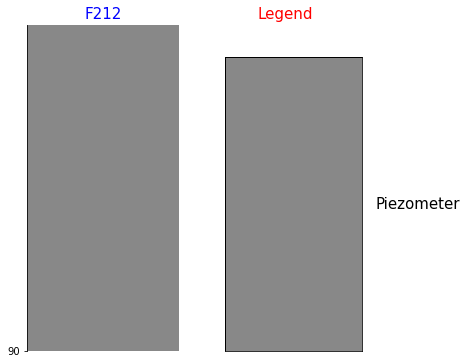

In [14]:
p.boreholes_3d[0].plot_log(repr_attribute=p.repr_attribute)

In [15]:
p.repr_attribute='lithology'

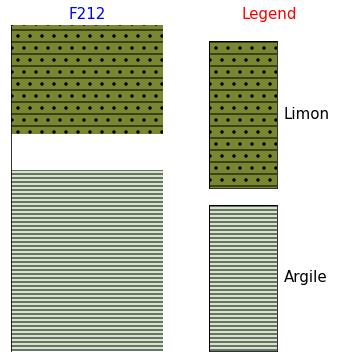

In [16]:
p.boreholes_3d[0].plot_log(repr_attribute=p.repr_attribute)

In [17]:
p.plot3d(window_size=(800, 600), repr_attribute='lithology', str_annotations=True, verbose=True)

Borehole "F212" | attribute values -> ['limon', 'argile']


/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/pyvista/core/dataset.py:1332: PyvistaDeprecationWarning: Use of `cell_arrays` is deprecated. Use `cell_data` instead.
  warnings.warn(


In [18]:
p.plot3d(window_size=(800, 600), repr_attribute='borehole_type', str_annotations=False, verbose=True)

Borehole "F212" | attribute values -> ['piezometer']


# Tests

In [19]:
p.plot3d(window_size=(800, 600), repr_attribute='benzene_industrial', str_annotations=False, verbose=True)

Borehole "F212" | attribute values -> ['VS', 'VI']


In [20]:
p.plot3d(window_size=(800, 600), repr_attribute='toluene_industrial', str_annotations=False, verbose=True)

ValueError: max() arg is an empty sequence